###Cat vs Dog Image Classifier using Convolutional Neural Networks (CNNs)
This project is a machine learning image classifier that uses convolutional neural networks (CNNs) to distinguish between images of cats and dogs. The model is trained on the 'cats_vs_dogs' tensorflow dataset of labeled cat and dog images, and uses CNNs to automatically learn features from the images that are useful for distinguishing between the two classes. The model is then able to make predictions on new images by analyzing the learned features and outputting a probability score for each class. This project has practical applications in areas such as animal recognition and pet monitoring, and can also serve as a learning exercise for those interested in computer vision and deep learning.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

###Loading data

In [ ]:
def resize_image(img, label):
  return tf.image.resize(img, [height, width]) / 255, label

height = 250
width = 250

In [ ]:
split = ['train[:80%]', 'train[80%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

In [ ]:
trainDataset = trainDataset.map(resize_image)
testDataset = testDataset.map(resize_image)

In [ ]:
classes_names = ['Cat', 'Dog']

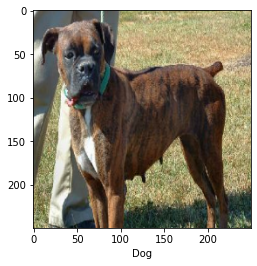

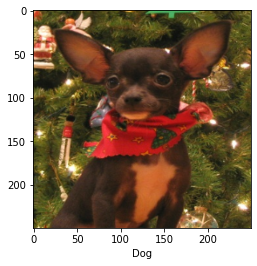

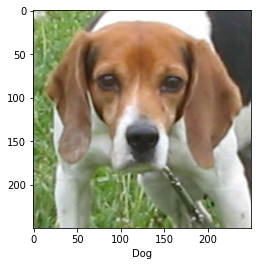

In [ ]:
for image, label in trainDataset.take(3):
  plt.figure()
  plt.imshow(image)
  plt.xlabel(f'{classes_names[label]}')

###Creating a CNN model

In [ ]:
trainDataset = trainDataset.batch(32)
testDataset = testDataset.batch(32)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(height, width, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(trainDataset, epochs=10, validation_data=testDataset, verbose=1)

Epoch 1/10
582/582 [==============================] - 60s 85ms/step - loss: 0.7001 - accuracy: 0.6261 - val_loss: 0.5826 - val_accuracy: 0.6928
Epoch 2/10
582/582 [==============================] - 49s 84ms/step - loss: 0.5191 - accuracy: 0.7382 - val_loss: 0.5648 - val_accuracy: 0.7225
Epoch 3/10
582/582 [==============================] - 44s 75ms/step - loss: 0.3526 - accuracy: 0.8412 - val_loss: 0.8604 - val_accuracy: 0.7006
Epoch 4/10
582/582 [==============================] - 43s 74ms/step - loss: 0.1943 - accuracy: 0.9219 - val_loss: 1.0576 - val_accuracy: 0.6913
Epoch 5/10
582/582 [==============================] - 47s 81ms/step - loss: 0.1123 - accuracy: 0.9595 - val_loss: 1.0870 - val_accuracy: 0.7180
Epoch 6/10
582/582 [==============================] - 48s 83ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 1.5668 - val_accuracy: 0.7072
Epoch 7/10
582/582 [==============================] - 43s 74ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 1.6239 - val_accuracy:

In [ ]:
model.save('c_vs_d.h5')

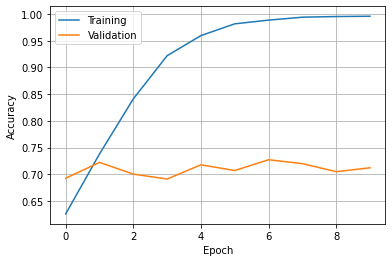

146/146 [==============================] - 8s 51ms/step - loss: 1.8611 - accuracy: 0.7124
Loss: 1.8611239194869995
Accuracy: 0.7123817801475525


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(testDataset)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

We get accuracy about 71%, which is rather poor. We'll make it higher, but first let's make several predictions.

8/8 [==============================] - 1s 46ms/step


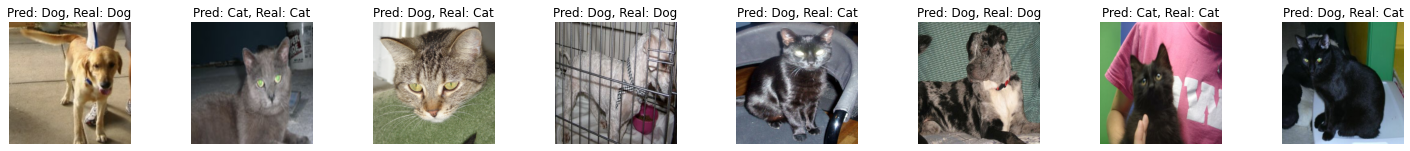

In [ ]:
predictions = model.predict(testDataset.take(8))

i = 0
fig, ax = plt.subplots(1, 8, figsize=(25,10))
for image, label in testDataset.take(8):
  predictedLabel = int(predictions[i] >= 0.5)
  ax[i].axis('off')
  ax[i].set_title(f'Pred: {classes_names[predictedLabel]}, Real: {classes_names[label[0]]}')
  ax[i].imshow(image[0])
  i += 1

plt.subplots_adjust(wspace=0.5)
plt.show()

Now let's check its performance on other images, which I found on the internet. We also need to choose the proper resize method:

1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 108ms/step


Text(0.5, 1.0, 'BICUBIC')

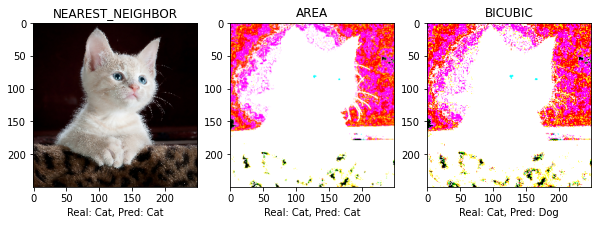

In [ ]:
image_1 = tf.io.read_file('cat.jpg')
image_1 = tf.image.decode_jpeg(image_1)
image_1 = tf.image.resize(image_1, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
image_1 = tf.expand_dims(image_1, axis=0)

image_2 = tf.io.read_file('cat.jpg')
image_2 = tf.image.decode_jpeg(image_2)
image_2 = tf.image.resize(image_2, [height, width], method=tf.image.ResizeMethod.AREA)
image_2 = tf.expand_dims(image_2, axis=0)

image_3 = tf.io.read_file('cat.jpg')
image_3 = tf.image.decode_jpeg(image_3)
image_3 = tf.image.resize(image_3, [height, width], method=tf.image.ResizeMethod.BICUBIC)
image_3 = tf.expand_dims(image_3, axis=0)




fig, axes = plt.subplots(1,3, figsize=(10,5))
axes[0].imshow(tf.squeeze(image_1))
axes[0].set_xlabel(f'Real: Cat, Pred: {classes_names[int(model.predict(image_1)[0][0])]}')
axes[0].set_title('NEAREST_NEIGHBOR')
axes[1].imshow(tf.squeeze(image_2))
axes[1].set_xlabel(f'Real: Cat, Pred: {classes_names[int(model.predict(image_2)[0][0])]}')
axes[1].set_title('AREA')
axes[2].imshow(tf.squeeze(image_3))
axes[2].set_xlabel(f'Real: Cat, Pred: {classes_names[int(model.predict(image_3)[0][0])]}')
axes[2].set_title('BICUBIC')

Let's keep nearest_neighbours as the resize method and make predictions on a few other pictures:

1/1 [==============================] - 0s 22ms/step


Text(0.5, 0, 'Real: Dog, Pred: Cat')

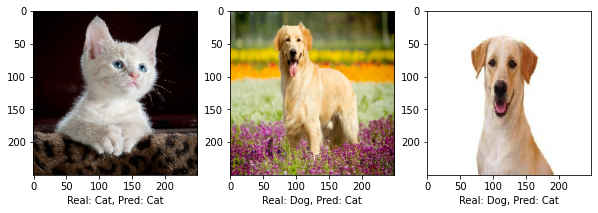

In [ ]:
image_1 = tf.io.read_file('cat.jpg')
image_1 = tf.image.decode_jpeg(image_1)
image_1 = tf.image.resize(image_1, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
image_1 = tf.expand_dims(image_1, axis=0)

image_2 = tf.io.read_file('dog.jpg')
image_2 = tf.image.decode_jpeg(image_2)
image_2 = tf.image.resize(image_2, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
image_2 = tf.expand_dims(image_2, axis=0)

image_3 = tf.io.read_file('dog_4.jpg') 
image_3 = tf.image.decode_jpeg(image_3)
image_3 = tf.image.resize(image_3, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
image_3 = tf.expand_dims(image_3, axis=0)




fig, axes = plt.subplots(1,3, figsize=(10,5))
axes[0].imshow(tf.squeeze(image_1))
axes[0].set_xlabel(f'Real: Cat, Pred: {classes_names[int(model.predict(image_1)[0][0])]}')
axes[1].imshow(tf.squeeze(image_2))
axes[1].set_xlabel(f'Real: Dog, Pred: {classes_names[int(model.predict(image_2)[0][0])]}')
axes[2].imshow(tf.squeeze(image_3))
axes[2].set_xlabel(f'Real: Dog, Pred: {classes_names[int(model.predict(image_3)[0][0])]}')

Let's also make a function for convinient prediction-making.

1/1 [==============================] - 0s 33ms/step


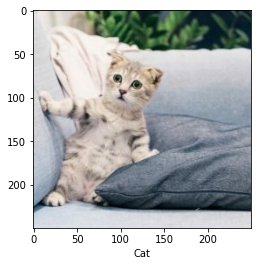

In [ ]:
def predict_for_the_picture(image):
  image = tf.io.read_file(image)
  image = tf.image.decode_jpeg(image)
  image = tf.image.resize(image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  image = tf.expand_dims(image, axis=0)
  plt.figure(figsize=(4,4))
  plt.imshow(tf.squeeze(image))
  plt.xlabel(f'{classes_names[int(model.predict(image)[0][0])]}')

predict_for_the_picture('cat_1.jpg')

###Creating a CNN model using a pretrained network
As we saw, the accuracy of our model is rather poor but we can significantly increase it by using a pretrained model. We are going to use MobileNetV2 for our case.

In [ ]:
IMG_SHAPE = (height, width, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 125, 125, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 125, 125, 32  128         ['Conv1[0][0]']                  
                                )                                              

We'll add to this pretrained model one pooling and one dense layers:

In [ ]:
base_model.trainable = False

global_average_layer = keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

model = keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(testDataset, steps = validation_steps)

20/20 [==============================] - 5s 80ms/step - loss: 0.7513 - accuracy: 0.4891


In [ ]:
history = model.fit(trainDataset,
                    epochs = initial_epochs,
                    validation_data=testDataset)
acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 50s 79ms/step - loss: 0.2366 - accuracy: 0.8989 - val_loss: 0.0903 - val_accuracy: 0.9721
Epoch 2/3
582/582 [==============================] - 45s 77ms/step - loss: 0.0745 - accuracy: 0.9759 - val_loss: 0.0597 - val_accuracy: 0.9789
Epoch 3/3
582/582 [==============================] - 55s 94ms/step - loss: 0.0570 - accuracy: 0.9814 - val_loss: 0.0510 - val_accuracy: 0.9800
[0.8989253044128418, 0.9758731722831726, 0.9813541173934937]


And here we obtain much higher accuracy: around 98%

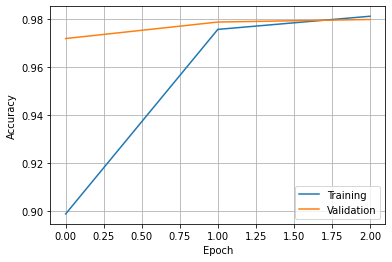

146/146 [==============================] - 9s 58ms/step - loss: 0.0510 - accuracy: 0.9800
Loss: 0.050985097885131836
Accuracy: 0.980008602142334


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(testDataset)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

In [ ]:
model.save('Cats_vs_Dogs.h5')

1/1 [==============================] - 0s 49ms/step


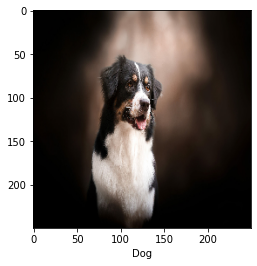

In [ ]:
predict_for_the_picture('dog_5.jpg')